## RMSD

1. Read xyz file for a MD trajectory or serious of structures, then calculate RMSD based on a reference structure...


In [5]:
import re
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import os
import scipy.linalg as la
%matplotlib inline  
# maybe some 3D plot for the molecule?? Is it possible?

#ORDER Matrix
# order = [24,25,20,21,22,23,5,15,6,26,27,7,16,29,28,30,31,17,48,49,8,18,51,50,52,53,19,32,54,35,34,13,38,37,36,39,41,42,43
# ,45,47,10,46,9,57,56,14,60,59,58,61,63,64,65,67,69,12,68,11,33,55,40,1,2,44,62,3,4,66,70,71,72,73,...]

In [58]:
class mol: # xyz file coord container
    
    def __init__(self):
        self.cord = np.zeros(N_atoms*3)
    
class g96:   # g96 (gromacs structure file) container
    
    def __init__(self):
        self.type = []
        self.cord = np.zeros(N_atoms*3)
        
class itp:
    
    def __init__(self):
        
        ##for [bonds] block:
        self.bond1 = []
        self.bond2 = []
        self.bondN = []
        self.bondEx = []
        self.bondchange = []

class CoordParser:   # Parse mol2/g96/... files
    
    def __init__(self, path, ref, traj):
        self.path = path
        self.ref = ref   # 
        self.traj = traj   # 
        
        self.cc = 0
        self.step = 0
        self.RMSD = []

        #orderM --> order matrix. can we get this automatically???
        self.mol_p = ''
        self.g96_p = ''
        self.mol = []
        self.g96 = []
        self.itp = []
        
    def calcRMSD(self):
        
        self.R_xyzCoord(self.ref)
        self.R_xyzCoord(self.traj)
        
        for i in range(self.step):
            temp = 0.
            for j in range(N_atoms):
                temp = temp + ((self.mol[i+1].cord[3*j] -self.mol[0].cord[3*j])**2 + \
                       (self.mol[i+1].cord[3*j+1] -self.mol[0].cord[3*j+1])**2 + \
                       (self.mol[i+1].cord[3*j+2] -self.mol[0].cord[3*j+2])**2)
                #print((self.mol[i+1].cord[3*j] -self.mol[0].cord[3*j])**2 + \
                #       (self.mol[i+1].cord[3*j+1] -self.mol[0].cord[3*j+1])**2 + \
                #       (self.mol[i+1].cord[3*j+2] -self.mol[0].cord[3*j+2])**2)
            temp = (temp / float(N_atoms))**0.5
            self.RMSD.append(temp)
        
        print(self.RMSD)
        
    def R_xyzCoord(self,filename):

        with open (self.path+filename) as file:
            lines = file.readlines()
            
            count = 0
            for line in lines:
                count = count + 1
            
            ii = count // (N_atoms+2)
            jj = count % (N_atoms+2)
            
            if jj != 0:
                print('problematic!!')
            
            if ii == 1 and self.cc == 0:
                print('use '+ filename + ' as reference')
                self.cc = 1
            else:
                print('use '+ filename + ' as trajectory')
                self.step = ii
            
            for i in range(ii):
            
                self.mol.append(mol())
                k = len(self.mol)
            
                for j in range(N_atoms):
                    self.mol[k-1].cord[3*j] = lines[2+j+i*(N_atoms+2)].split()[1]   #unit in A
                    self.mol[k-1].cord[3*j+1] = lines[2+j+i*(N_atoms+2)].split()[2]
                    self.mol[k-1].cord[3*j+2] = lines[2+j+i*(N_atoms+2)].split()[3]
        #for i in range(k):
        #    print(self.mol[i].cord)
                    
    def RMSDplot(self,timestep):
        
        xx = [x*timestep for x in range(0,len(self.RMSD))]
        plt.plot(xx,self.RMSD)
        plt.xlabel('Time (fs)')
        plt.ylabel('RMSD (A)')
        

In [45]:
path = './test_RMSD/'
N_atoms = 85
optN = 'Y6_qm_opt.xyz'
optEx = 'Y6_qm-LJ-ALLNB.xyz'

Single = CoordParser(path,optN,optEx)
Single.calcRMSD()



use Y6_qm_opt.xyz as reference
use Y6_qm-LJ-ALLNB.xyz as trajectory
85.0
85.0
85.0
[0.0, 0.14416723002437373, 0.66181657327151822]


In [63]:
path = './test_RMSD/'
N_atoms = 340
optN = 'Y6_crystal_111.xyz'
optEx = 'Y6_crystal111_cryl_LJ_ALLNB.xyz'

Crystal = CoordParser(path,optN,optEx)
Crystal.calcRMSD()

use Y6_crystal_111.xyz as reference
use Y6_crystal111_cryl_LJ_ALLNB.xyz as trajectory
[0.0, 0.59880675557547725, 0.64099858229322371]


use Y6_crystal_111.xyz as reference
use run-pos-1.xyz as trajectory
[0.0, 0.37491003511878362, 0.49504148543674298, 0.57663560677829795, 0.63894191643969334, 0.65555546380862639, 0.66324351180376195, 0.655079665692061, 0.67955244717667451, 0.70853070596233336, 0.75887056014355059, 0.80774653769983473, 0.82838503917869744, 0.86070813631607657, 0.91113971808309513, 0.95282454031316588, 0.99712592862081684, 1.0731470208196949, 1.1500599572346812, 1.1898758656955579, 1.2199398136686044, 1.247018698500844, 1.2816875930668004, 1.3276623532014726, 1.3853985867146774, 1.428004999530897, 1.4481636195960967, 1.4608824850223618, 1.4610975006692062, 1.4694603614797108, 1.5146241122898394, 1.5423121284743684, 1.5493921533463801, 1.5518151047375874, 1.5360942588633562, 1.5181617860294552, 1.5184472359314862, 1.5277698626909006, 1.5193065600491957, 1.5092239327573689, 1.4993456693262899, 1.5004732196431958, 1.5112229385257641, 1.4951173046743245, 1.5039788674774976, 1.4871136564534406, 1.468695768402

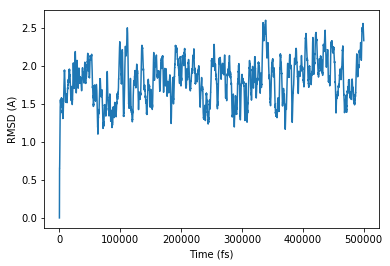

In [61]:
path = './test_RMSD/'
N_atoms = 340
optN = 'Y6_crystal_111.xyz'
optEx = 'run-pos-1.xyz'

CrystalMD = CoordParser(path,optN,optEx)
CrystalMD.calcRMSD()
CrystalMD.RMSDplot(50)

In [68]:
path = './ReorgE_geom/'
N_atoms = 85
optN = 'Y6_wB97_Neutral.xyz'
optEx = 'Y6_wB97_Excited.xyz'
itpfile = 'Y6.itp' 

wB97 = CoordParser(path,optN,optEx,itpfile)
wB97.calcBond()



1
2
1.42537835339
1.43399726663
-0.00861891323844


2
3
1.43232917767
1.43527805756
-0.00294887989127
3
4
1.44735050475
1.43713946817
0.010211036581
4
5
1.43232923908
1.43528323376
-0.00295399468241


5
6
1.42537157045
1.43400422162
-0.0086326511655


1
6
1.43178832702
1.40523257395
0.026555753069


3
7
1.32723327042
1.31967075027
0.00756252014525




4
9
1.3272325355
1.3196710655
0.00756147000723


7
8
1.65903596811
1.64387727994
0.0151586881704
8
9
1.65903171646
1.64387191559
0.0151598008704
2
10
1.40751765585
1.38723817091
0.0202794849369
10
11
1.39974594475
1.41011173148
-0.0103657867355


11
12
1.3857467493
1.37640603586
0.00934071343722


1
12
1.39365865186
1.39112148922
0.00253716263513


10
13
1.74681772399
1.73839455541
0.00842316857555




13
14
1.77373356812
1.7666221327
0.00711143542475


14
15
1.40734096815
1.40968367008
-0.0023427019297
11
15
1.40999716895
1.39417280907
0.0158243598772
14
16
1.39870448498
1.38711027704
0.0115942079331
16
17
1.41904390849
1.42351418283
-

In [45]:
path = './test/'
N_atoms = 85
N_mol = 2

# note: order is mol2 to g96... i.e. 24th atom in mol2 is the 1st atom in g96
# note: so the 5th atom in mol2 which is a N atom, is the 7th atom in g96...
order = [24,25,20,21,22,23,5,15,6,26,27,7,16,29,28,30,31,17,48,49,8,18,51,50,52,53,19,32,54,35,34,13,38,37,36,39,\
         41,42,43,45,47,10,46,9,57,56,14,60,59,58,61,63,64,65,67,69,12,68,11,33,55,40,1,2,44,62,3,4,66,70,71,72,73\
         ,74,75,76,77,78,79,80,81,82,83,84,85]

BOX = [14.46910,20.95814,28.68215,0.0,0.0,-3.09819,0.0,-3.36521,-10.82881]
# Unit cell vector for Y6 111 crystal structure...
#BOX in gromacs format (gro/g96...) --> v1(x) v2(y) v3(z) v1(y) v1(z) v2(x) v2(z) v3(x) v3(y)
#--> note: the last 6 values are optional, and Gromacs only supports v1(y) = v1(z) = v2(z) = 0 

test = CoordParser(path,order)

## Read functions: read mol2/g96/itp files, check what files are in current directory...
#test.CheckFiles()
##test.R_mol2Coord()
#test.R_grog96()
#test.R_itp()

## Write functions: 
## 1. from mol2 file, build gromacs g96 file 
## 2. from gromacs itp file, build (part of) prm file 3. from gromacs itp file, build psf
#test.W_mol2tog96()
test.W_itp2prmNB()
#test.W_itp2psf()
#test.W_g96toxyz()
#test.W_CP2Kin_KIND()
#test.W_itp2prmBADI()
#test.W_g96toxyz_shift()


JMCC20_Y6_dimer.mol2 is in use for mol2 file
y6_opt_freq_min.g96 is in use for g96 file
Y6_HTdelta_modified.itp is in use for itp file
Use Y6_HTdelta_modified.itp


In [65]:
path = './test_dimer/m2/'
N_atoms = 85
N_mol = 1

# note: order is mol2 to g96... i.e. 24th atom in mol2 is the 1st atom in g96
# note: so the 5th atom in mol2 which is a N atom, is the 7th atom in g96...
order = [24,25,20,21,22,23,5,15,6,26,27,7,16,29,28,30,31,17,48,49,8,18,51,50,52,53,19,32,54,35,34,13,38,37,36,39,\
         41,42,43,45,47,10,46,9,57,56,14,60,59,58,61,63,64,65,67,69,12,68,11,33,55,40,1,2,44,62,3,4,66,70,71,72,73\
         ,74,75,76,77,78,79,80,81,82,83,84,85]

dimer = CoordParser(path,order)
#dimer.R_mol2Coord()
dimer.W_mol2tog96()
#dimer.W_g96toxyz()

Y6_m2.mol2 is in use for mol2 file
y6_opt_freq_min.g96 is in use for g96 file
 is in use for itp file
Use Y6_m2.mol2
Y6_m2.mol2 is in use for mol2 file
y6_opt_freq_min.g96 is in use for g96 file
 is in use for itp file
Use y6_opt_freq_min.g96


In [2]:
# for xyz file with multiple molecules, each molecule has to arrange its atoms in a specified order
def W_xyzinOrder(path,N_a,pathw): #rearrange each molecule in the correct atoms order
    
    with open (path) as file:
        lines = file.readlines()
        tot_a = int(lines[0].split()[0])
        tot_m = int(tot_a/N_a)
        
        with open (pathw,'w') as out:
        
            out.write(lines[0])
            out.write('\n')
        
            for i in range(tot_m):
                for j in range(N_a):
                    out.write(lines[1+order[j]+i*85])
    
    

In [6]:
path = './ReorgE_geom/Y6_wB97_Neutral.xyz'
N_atoms = 85
pathw = './ReorgE_geom/order/Y6_wB97_Neutral.xyz'

# note: order is mol2 to g96... i.e. 24th atom in mol2 is the 1st atom in g96
# note: so the 5th atom in mol2 which is a N atom, is the 7th atom in g96...
order = [24,25,20,21,22,23,5,15,6,26,27,7,16,29,28,30,31,17,48,49,8,18,51,50,52,53,19,32,54,35,34,13,38,37,36,39,\
         41,42,43,45,47,10,46,9,57,56,14,60,59,58,61,63,64,65,67,69,12,68,11,33,55,40,1,2,44,62,3,4,66,70,71,72,73\
         ,74,75,76,77,78,79,80,81,82,83,84,85]
W_xyzinOrder(path,N_atoms,pathw)


## CP2K FIST single point energy parser

In [27]:
class cp2kSP:
    
    def __init__(self, path):
        self.bond = 0.
        self.angle = 0.
        self.torsion = 0.
        self.imptor = 0.
        self.bonded = 0. # kcal/mol
        self.totE = 0. # au
        self.NB = 0. # kJ/mol
        self.au2kcal = 627.5095 #au --> kcal/mol
        self.kcal2kj = 4.184  #kcal/mol --> au
        self.NB_kJ = 0.
        self.path = path
        
    def CP2Kparser(self):
        
        with open(self.path+'sp.log') as file:
            lines = file.readlines()
            for num, line in enumerate(lines):
                if 'FIST energy contributions' in line:
                    line_b = num+1
                elif 'ENERGY|' in line:
                    line_t = num
                    break
            self.bond = float(lines[line_b].split()[2])
            self.angle = float(lines[line_b].split()[5])
            self.torsion = float(lines[line_b+1].split()[2])
            self.imptor = float(lines[line_b+1].split()[5])
            self.bonded = self.bond + self.angle + self.torsion + self.imptor
            self.totE = float(lines[line_t].split()[8])
            self.NB = self.totE*self.au2kcal*self.kcal2kj - self.bonded*self.kcal2kj
        print(str(self.NB)+' kJ/mol')
        

In [28]:
path = './test/'

test = cp2kSP(path)
test.CP2Kparser()

-355.7898519089881 kJ/mol


## Nonbonded interactions calculators: Electrostatics and LJ

In [38]:
## Electrostatic interation
eps0 = 8.854187817*10**(-12)  # C^2/J-m
qq = 1.60217733*10**(-19)  # C
Avog = 6.02214076*10**23  # Avogadro number
A2m = 10**(-10)  # ang to meter
J2kJpermol = Avog/1000.

def calcElec(r_ij, charge1, charge2):
    EElec = (charge1*charge2*(qq**2)/(4*math.pi*eps0*r_ij*A2m))*J2kJpermol
    print(EElec)

In [42]:
# C2 - S8
r_ij = 3.808
charge1 = 0.255869
charge2 = -0.180426

calcElec(r_ij, charge1,charge2)

# O32 - O47
r_ij = 12.903
charge1 = -0.476438
charge2 = -0.476438

calcElec(r_ij, charge1,charge2)

-16.843538213152115
24.441933691283236


In [ ]:
def LJ_charmm(eps, sig):
    

# LJ
####INPUT####
#ATOM1
eps1 = 
sig1 =
#ATOM2
eps2 =
sig2 =
parm = ''  #CHM(CHARMM)/GRO(GROMACs)
#############

#combination rule:
eps_ = (eps1*eps2)**(0.5)
sig_ = (sig1+sig2)*0.5

if parm = 'CHM':
    pass
elif parm = 'GRO':  # conversion: units, factors, ...
    eps_ = 
    sig_ = 
else:
    print('no such force field')
    

